In [1]:
%pylab inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import timeit
import warnings
from itertools import product
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

In [4]:
import ipyleaflet as il

In [5]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import numpy as np

def n_colors(n, colormap=mpl.cm.Blues):
    data = np.linspace(0.0,1.0,n)
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(data)]
    return c

def data_to_colors(data, colormap=mpl.cm.Blues):
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(mpl.colors.Normalize()(data))]
    return c

In [39]:
colors=n_colors(2)

In [40]:
color=colors[0]

In [6]:
#Функция возвращает код региона по координатам
#0- когда нет региона
def get_region(lon,lat):
    r=0
    r=regions.loc[(regions.west<lon)&
           (regions.east>lon)&
           (regions.south<lat)&
           (regions.north>lat)
           ,'region'].values
    if r.shape[0]==0:
        return 0
    return r[0]

In [8]:
# Номера регионов для обработки берём из перыдущих работ, поэтому сразу готовый список.
regions_ids = [1075, 1076, 1077, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132,
       1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182,
       1183, 1184, 1221, 1222, 1223, 1224, 1225, 1227, 1228, 1229, 1230,
       1231, 1232, 1233, 1234, 1235, 1272, 1273, 1274, 1278, 1279, 1280,
       1281, 1282, 1283, 1284, 1285, 1286, 1287, 1326, 1327, 1331, 1332,
       1333, 1334, 1335, 1336, 1337, 1338, 1339, 1376, 1377, 1378, 1380,
       1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1426, 1431,
       1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1480, 1482, 1483,
       1530, 1532, 1533, 1580, 1630, 1684, 1733, 1734, 1783, 2068, 2069,
       2118, 2119, 2168]

In [7]:
# загружаем данные регионов
#regions=pd.read_csv('g:/python_kurs/kurs6/taxi/regions.csv',sep=';')
regions=pd.read_csv('regions.csv',sep=';')
regions.head(6)

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061
5,6,-74.25559,-74.244478,40.538061,40.546449


In [9]:
# загружаем данные с регрессионными признаками с 5 недели за 11 2015 - июнь 2016
#dt9=pd.read_csv('g:/python_kurs/kurs6/taxi/dt9_dop_11_2015_05_2016_102_2.csv')
dt9=pd.read_csv('dt10_data.csv')
dt9=dt9.set_index('dtt')

In [36]:
from IPython.html import widgets
# add button that updates the graph based on the checkboxes
button = widgets.Button(description=u"Нарисовать график")


In [37]:
# function to deal with the checkbox update button      
def on_button_clicked(b):
    region1=NumberofRegion.value
    print 'Регион №',region1
    data=dt9.loc[dt9.region_pickup==int(region1),:]
    if len(data)==0:
        print ' Нет данных для данного региона'
    else:
        plt.clf()
        plt.figure(figsize(15,7))
        l8=len(data)-720
        data.vcc[:l8-1].plot()
        data.fc1.plot(color='r')
        plt.ylabel('trip count')
        plt.title('Region #{}'.format(region1))
        plt.legend()
        plt.draw()
        plt.show()


In [38]:

button.on_click(on_button_clicked)



In [13]:
NumberofRegion=widgets.Text()
NumberofRegion.value='1533'


In [32]:
lat = 40.748445
lon = -73.985664
center = [lat, lon]
zoom = 12
mark = Marker(location=center)

In [51]:
def map_on_date(year,month,day,hour):
    lat = 40.748445
    lon = -73.985664
    center = [lat, lon]
    zoom = 13
    
    m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    data_rm=dt9.loc[(dt9.year==year)&
                (dt9.month==month)&
                (dt9.day==day)&
                (dt9.pickup_hour==hour),:]
    if len(data_rm)== 0:
        m.close()
        return
    pr=u''
    f='vcc'
    colormap=mpl.cm.Blues
    if (year==2016)&(month==6):
        colormap=mpl.cm.RdBu_r
        f='fc1'
        pr=u' Прогноз '
    colors1 = data_to_colors(data_rm[f],colormap)
    colors2 = data_to_colors(data_rm[f],mpl.cm.RdBu_r)
    #print data_rm.vcc
    for region, color, fcolor in zip(regions_ids, colors1, colors2):
        r=regions.loc[regions.region==region]
        bounds = [(r.north.values[0],r.west.values[0]),
              (r.north.values[0],r.east.values[0]),
              (r.south.values[0],r.east.values[0]),
              (r.south.values[0],r.west.values[0])
          ]
        pg = il.Polygon(locations=bounds, weight=1,
            color=fcolor, opacity=0.8, fill_opacity=0.5,
            fill_color=color)
        
        m += pg
    t=widgets.Text()
    txt=u'Дата {}-{}-{} {}:00:00 {}'.format(day,month,year,hour,pr)
    t.value=txt
    display(t)
    display(m)

In [50]:
def map_on_all():
    lat = 40.748445
    lon = -73.985664
    center = [lat, lon]
    zoom = 12
    #mark = Marker(location=center)
    m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    data_rm=dt9.groupby('region_pickup').sum().reset_index()
    if len(data_rm)== 0:
        m.close()
        return
    colors1 = data_to_colors(data_rm['vcc'])
    colors2 = data_to_colors(data_rm['vcc'],mpl.cm.RdBu_r)
    #print data_rm.vcc
    for region, color,fcolor in zip(regions_ids, colors1, colors2):
        r=regions.loc[regions.region==region]
        bounds = [(r.north.values[0],r.west.values[0]),
              (r.north.values[0],r.east.values[0]),
              (r.south.values[0],r.east.values[0]),
              (r.south.values[0],r.west.values[0])
          ]
        pg = il.Polygon(locations=bounds, weight=1,
            color=fcolor, opacity=0.8, fill_opacity=0.5,
            fill_color=color)
        
        m += pg
    m += mark
    m.touch_zoom=False
    m.on_msg(handle_region)
    m.on_trait_change(handle_region)
    display(NumberofRegion)
    display(button)
    display(m)

In [17]:

def handle_region(self, action, geo_json):
    d=geo_json
    region=NumberofRegion.value
    #print region
    try:
        if d.has_key(u'center'):
            center = d.get(u'center')
            #print 'center ',center
            
            region = get_region(center[1],center[0])
            #print 'region ',region
            NumberofRegion.value=str(region)
            #print(action)
            #print(geo_json)
            
            mark.visible=False
            mark.location=center
            mark.visible=True
          
    except:
        
        region=NumberofRegion.value
    return region

Интерактивная карта Нью-Йорка, с визуализацией реального и прогнозируемого спроса на такси в выбираемый пользователем момент времени

In [52]:
from IPython.html import widgets
widgets.interact(map_on_date, year=(2015,2016,1), month=(1,12,1), day=(1,31,1), hour=(0,24,1))

Нарисуйте временной ряд фактического и прогнозируемого спроса на такси в выбираемой области на интерактивной карте Нью-Йорка.

Регион № 1231


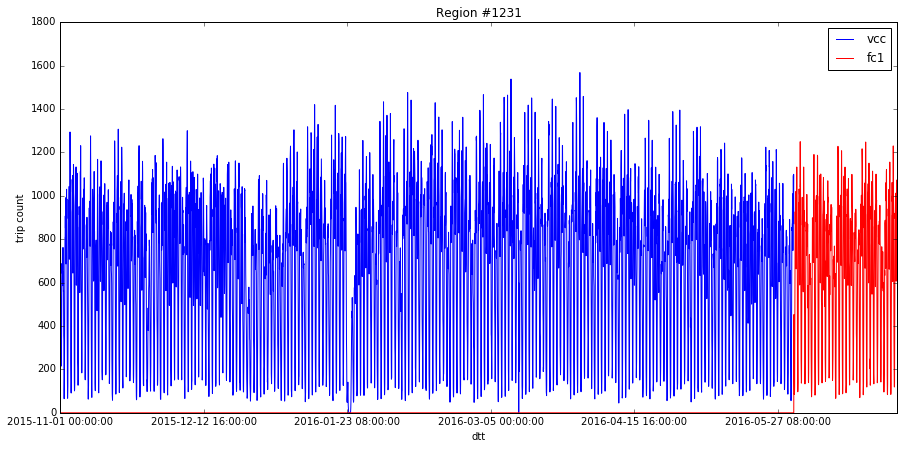

In [53]:
# Двойным кликом выберите область (или введите код региона) и нажмите кнопку "Нарисовать график"
map_on_all()